In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Chuẩn bị dữ liệu

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
np.random.seed(0)

In [27]:
df = pd.read_csv('/content/drive/MyDrive/CS116.Python_ML/Lab/CS116.P22 - Lab 6 (Problem)/data/USA_Housing.csv')
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [28]:
df = df.drop(columns=['Address'])
assert df.shape == (5000, 6)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
df['Avg. Area Income'] = scale.fit_transform(np.array(df['Avg. Area Income']).reshape(-1, 1))
df['Area Population'] = scale.fit_transform(np.array(df['Area Population']).reshape(-1, 1))
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,0.686822,5.682861,7.009188,4.09,0.329942,1.059034e+06
1,0.683521,6.002900,6.730821,3.09,0.575968,1.505891e+06
2,0.483737,5.865890,8.512727,5.13,0.528582,1.058988e+06
3,0.506630,7.188236,5.586729,3.26,0.491549,1.260617e+06
4,0.469223,5.040555,7.839388,4.23,0.376988,6.309435e+05
...,...,...,...,...,...,...
4995,0.475738,7.830362,6.137356,3.46,0.326351,1.060194e+06
4996,0.675097,6.999135,6.576763,4.02,0.366362,1.482618e+06
4997,0.507135,7.250591,4.805081,2.13,0.476515,1.030730e+06
4998,0.558419,5.534388,7.130144,5.44,0.611282,1.198657e+06


In [30]:
x = df.drop(columns=['Price'])
y = df['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.01)

# Huấn luyện mô hình

In [31]:
from sklearn.model_selection import GridSearchCV

# Khởi tạo không gian siêu tham số
param_grid_svr = {'C': [1, 1000, 1000000, 5000000], 'epsilon' : [1, 1000, 10000], 'kernel' : ['linear', 'rbf']}
paran_grid_dr = {'max_depth' : [3, 5, 10, 20, None], 'min_samples_split' : [2, 5, 10], 'min_samples_leaf' : [1, 2, 5]}
param_grid_knn = {'n_neighbors' : [3, 5, 7, 10, 20], 'weights' : ['uniform', 'distance']}

lr = LinearRegression() # Linear Regression
svr = GridSearchCV(estimator=SVR(), param_grid=param_grid_svr, cv=5, n_jobs=-1, verbose=2) # Support Vector Regression
knn = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=param_grid_knn, cv=5, n_jobs=-1, verbose=2) # Decision Tree Regressor
dr = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=paran_grid_dr, cv=5, n_jobs=-1, verbose=2) # KNN

In [32]:
lr.fit(x_train, y_train)

LinearRegression()

In [33]:
svr.fit(x_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1, 1000, 1000000, 5000000],
                         'epsilon': [1, 1000, 10000],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [34]:
knn.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 10, 20],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [35]:
dr.fit(x_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 20, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [38]:
# Tìm bộ tham số tốt nhất
best_param_svr = svr.best_params_
best_param_knn = knn.best_params_
best_param_dr = dr.best_params_
print('Best param SVR: ', best_param_svr)
print('Best param KNN: ', best_param_knn)
print('Best param DR: ', best_param_dr)

Best param SVR:  {'C': 1000000, 'epsilon': 10000, 'kernel': 'linear'}
Best param KNN:  {'n_neighbors': 5, 'weights': 'distance'}
Best param DR:  {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 10}


In [39]:
# Đánh giá bằng tập test
prep_lr = lr.predict(x_test)
prep_dr = dr.predict(x_test)
prep_svr = svr.predict(x_test)
prep_knn = knn.predict(x_test)

In [40]:
# MAE, MSE
mae_lr = mean_absolute_error(y_test, prep_lr)
mse_lr = mean_squared_error(y_test, prep_lr)

mae_dr = mean_absolute_error(y_test, prep_dr)
mse_dr = mean_squared_error(y_test, prep_dr)

mae_svr = mean_absolute_error(y_test, prep_svr)
mse_svr = mean_squared_error(y_test, prep_svr)

mae_knn = mean_absolute_error(y_test, prep_knn)
mse_knn = mean_squared_error(y_test, prep_knn)

# So sánh mô hình

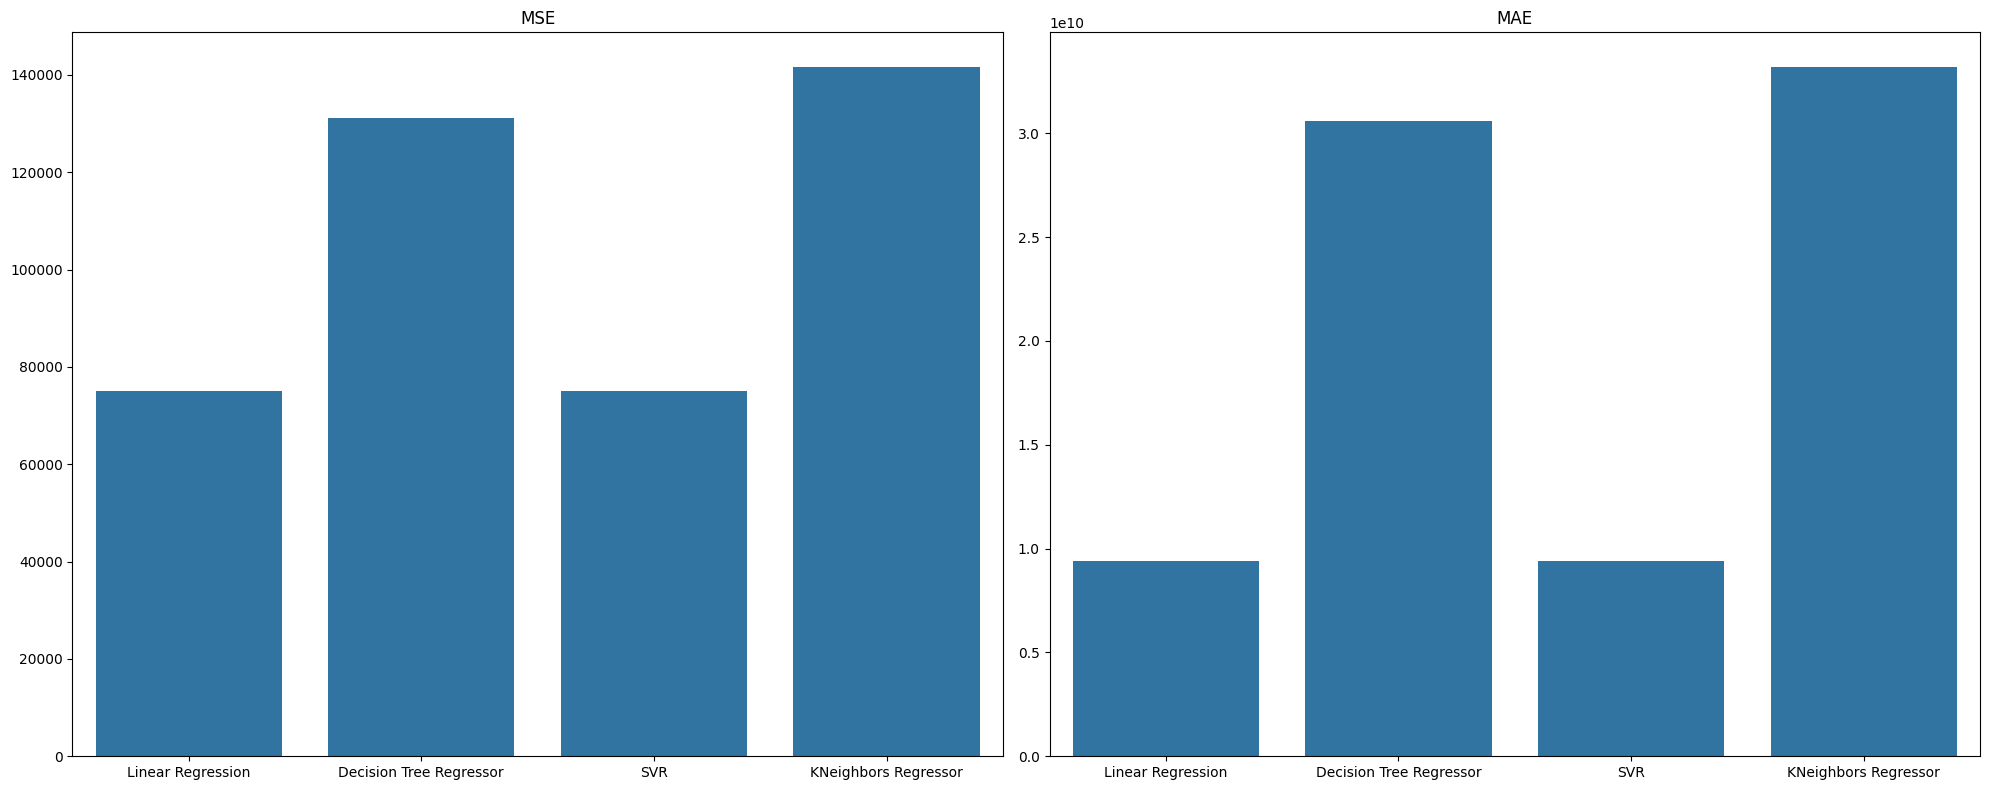

In [45]:
mse = [mae_lr, mae_dr, mae_svr, mae_knn]
mae = [mse_lr, mse_dr, mse_svr, mse_knn]
label = ['Linear Regression', 'Decision Tree Regressor', 'SVR', 'KNeighbors Regressor']
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot(x=label, y=mse, ax=ax[0])
ax[0].set_title('MSE')
sns.barplot(x=label, y=mae, ax=ax[-1])
ax[1].set_title('MAE')
plt.tight_layout()

Mô hình tốt nhất: SVR

Dựa trên kết quả từ quá trình tinh chỉnh và đánh giá, SVR thể hiện hiệu suất vượt trội so với các mô hình khác. Cụ thể, giá trị MSE (Mean Squared Error) và MAE (Mean Absolute Error) của SVR là thấp nhất, cho thấy khả năng dự đoán gần sát với dữ liệu thực tế. Điều này khẳng định SVR là lựa chọn phù hợp nhất trong trường hợp này.

SVR tốt nhất vì:
- Khả năng xử lý dữ liệu phi tuyến tính: SVR có thể mô hình hóa mối quan hệ phức tạp giữa các biến độc lập (input features) và biến phụ thuộc (output), đặc biệt là khi dữ liệu có những đặc điểm phi tuyến tính. Điều này giúp nó vượt trội hơn các mô hình tuyến tính đơn giản như Linear Regression trong việc dự đoán các trường hợp phức tạp.

- Độ chính xác cao với nhiễu trong dữ liệu: SVR sử dụng hàm epsilon-insensitive loss, cho phép nó bỏ qua các sai lệch nhỏ giữa giá trị thực và giá trị dự đoán trong phạm vi epsilon. Điều này giúp mô hình không bị ảnh hưởng nhiều bởi nhiễu dữ liệu, từ đó cải thiện độ chính xác và khả năng tổng quát hóa.

- Tinh chỉnh tham số hiệu quả: Thông qua GridSearchCV, các tham số của SVR như C, epsilon, và kernel đã được tối ưu hóa để đạt hiệu suất tốt nhất. Trong đó, tham số C lớn giúp mô hình tránh bị underfitting, và kernel=linear phù hợp với dữ liệu trong trường hợp này.

- Khả năng chuẩn hóa dữ liệu: Dữ liệu đầu vào đã được chuẩn hóa bằng MinMaxScaler, giúp các biến độc lập có cùng tỷ lệ, giảm thiểu tác động của các giá trị cực đại hoặc cực tiểu. Điều này đặc biệt hữu ích cho SVR, vì nó yêu cầu dữ liệu đầu vào phải được chuẩn bị kỹ lưỡng để hoạt động tối ưu.

So sánh với các mô hình khác:
- Linear Regression: Dễ bị ảnh hưởng bởi các điểm ngoại lệ và không phù hợp với dữ liệu phi tuyến tính.

- KNN: Phụ thuộc nhiều vào số lượng láng giềng và có thể kém hiệu quả với dữ liệu có nhiễu.

- Decision Tree Regressor: Mặc dù mạnh mẽ, nhưng dễ bị overfitting, đặc biệt khi không được tối ưu hóa đúng cách.